In [5]:
import cdms
import rawio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

In [6]:
def low_pass_filter(data, alpha):
    """
    Applies a simple low-pass filter to a data series.

    :param data: a list or array of numeric data
    :param alpha: a smoothing factor between 0 and 1
    :return: a list containing the filtered data
    """
    filtered = [data[0]]  # initialize the filtered data with the first value of the input
    for i in range(1, len(data)):
        filtered.append(alpha * data[i] + (1 - alpha) * filtered[-1])
    return filtered



def butter_lowpass_filter(data, cutoff_frequency, sampling_rate=625000, order=4):
    cutoff_frequency *= 1000
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

In [7]:
#chanNames=["PAS1","PBS1","PCS1","PDS1","PES1","PFS1","PAS2","PBS2","PCS2","PDS2","PES2","PFS2"]
chanNames=["PBS1","PCS1","PDS1","PES1","PFS1","PAS2","PBS2","PCS2","PDS2","PES2","PFS2"]


filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Raw/23231204_173023/23231204_173023_F0005.mid.gz"
#filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Raw/23231204_173023/23231204_173023_F0006.mid.gz"
#filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Raw/23231204_173023/23231204_173023_F0012.mid.gz"



#30219
#23231202_024711
## good events: 71096, 80177, 120510, 290480, 290562, 300000, 350148

myreader = rawio.RawDataReader(filepath)

events = myreader.read_events(output_format=2,
                                  skip_empty=True,
                                  event_nums=[50019,50306],
                                  #event_nums=[60094,60623],
                                  #event_nums=[120177,120707],
                                  trigger_types=[1],
                                  detector_nums=[3],
                                  channel_names=chanNames)

INFO: Found 1 midas raw data files
The file is: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Raw/23231204_173023/23231204_173023_F0005.mid.gz

Opened raw midas file: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Raw/23231204_173023/23231204_173023_F0005.mid.gz


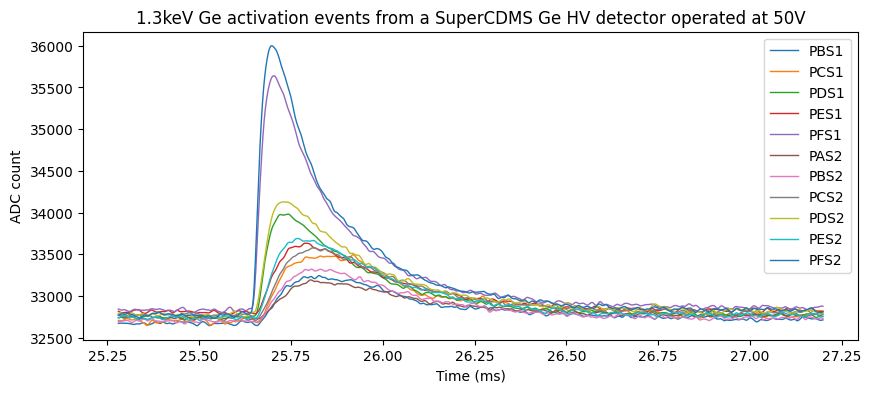

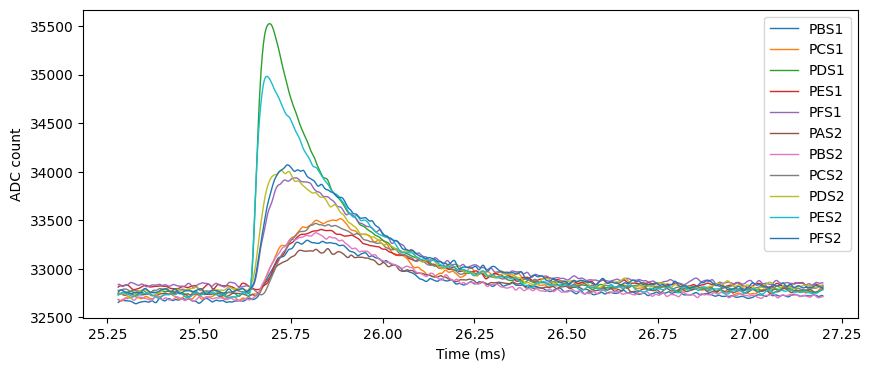

In [8]:
pt_events = []

sampling_interval = 1/625
low_bound = 15800
up_bound = 17000

for id in range(len(events)):
    traces = events[id]["Z3"]

    plt.figure(figsize=(10, 4))
    if (id==0):
        plt.title("1.3keV Ge activation events from a SuperCDMS Ge HV detector operated at 50V")
    pt = np.zeros(32768)
    ctr = 0    
    for chan in chanNames:
        pt += traces[chan]
        ctr += 1
        #plt.plot(low_pass_filter(traces[chan], 1)[15800:16700], label=chan, linewidth=3)
        time = np.arange(0, len(traces[chan]) * sampling_interval, sampling_interval)
        plt.plot(time[low_bound:up_bound], butter_lowpass_filter(traces[chan], 50)[low_bound:up_bound], label=chan, linewidth=1)
        plt.xlabel("Time (ms)")
        plt.ylabel("ADC count")
    pt /= ctr
    pt_events.append(pt)
    plt.legend()

plt.savefig('output_plot.pdf')


    

tesgt

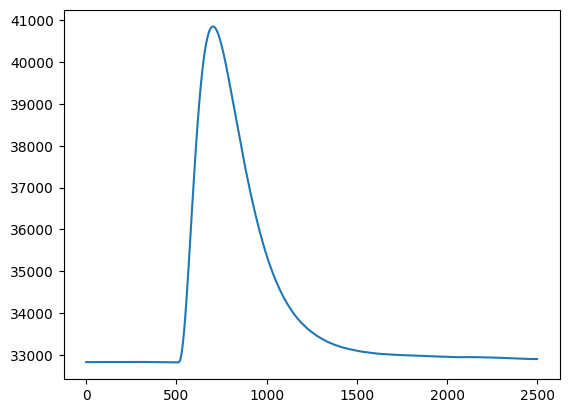

In [12]:
# plotting pt
plt.plot(low_pass_filter(pt, 0.01)[15500:18000])

more example at: https://gitlab.com/supercdms/DataHandling/pyRawIO/-/blob/master/demos/data_reader.ipynb?ref_type=heads